<a href="https://colab.research.google.com/github/souta2352/sentiLIAR/blob/main/0122_changebert%2Bcalspc_sentimentalLIAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#statement/meta
#add spc <- not concat
#sentiment_codeなし
#nameなし
#emotion場所→前

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# !nvidia-smi

In [ ]:
# !pip install -U torch torchvision torchaudio

In [ ]:
!pip install -q transformers

In [ ]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/B4kudo/dataset/SentimentalLIAR_master_train_final.csv")
df_test=pd.read_csv("/content/drive/MyDrive/B4kudo/dataset/SentimentalLIAR_master_test_final.csv")
df_valid=pd.read_csv("/content/drive/MyDrive/B4kudo/dataset/SentimentalLIAR_master_valid_final.csv")
print("before truncating size of data is :", df.shape, df_test.shape,df_valid.shape)
df=df[:10232]
df_test=df_test[:1264]
df_valid=df_valid[:1280]
print("size of data is :", df.shape, df_test.shape, df_valid.shape)


#check if any null values are present
print("Any null in Subject? ",df['subject'].isnull().values.any())
print("Any null in Speaker? ",df['speaker'].isnull().values.any())
print("Any null in speaker_job? ",df['speaker_job'].isnull().values.any())
print("Any null in Party? ",df['party_affiliation'].isnull().values.any())
print("Any null in Context? ",df['context'].isnull().values.any())

before truncating size of data is : (10236, 31) (1267, 30) (1283, 31)
size of data is : (10232, 31) (1264, 30) (1280, 31)
Any null in Subject?  False
Any null in Speaker?  False
Any null in speaker_job?  True
Any null in Party?  False
Any null in Context?  True


In [ ]:
df["data_statement"]=df["statement"]
df['data_meta']=df['subject'].astype(str)+ ". "+ df['speaker_job'].astype(str)+ ". "+ df['party_affiliation'].astype(str)\
+ ". "+ df['context'].astype(str)


df_test["data_statement"]=df_test["statement"]
df_test['data_meta']=df_test['subject'].astype(str)+ ". "+ df_test['speaker_job'].astype(str)+ ". "+ df_test['party_affiliation'].astype(str)\
+ ". "+ df_test['context'].astype(str)


df_valid["data_statement"]=df_valid["statement"]
df_valid['data_meta']=df_valid['subject'].astype(str)+ ". "+ df_valid['speaker_job'].astype(str)+ ". "+ df_valid['party_affiliation'].astype(str)\
+ ". "+ df_valid['context'].astype(str)

<ipython-input-7-4462e959c36e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["data_statement"]=df["statement"]
<ipython-input-7-4462e959c36e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['data_meta']=df['subject'].astype(str)+ ". "+ df['speaker_job'].astype(str)+ ". "+ df['party_affiliation'].astype(str)\
<ipython-input-7-4462e959c36e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

In [ ]:
# # sentiment_codeを-1, 0, 1に変換する関数
# def convert_sentiment_code(sentiment_code):
#     if sentiment_code in ['_NEG_']:
#         return -1
#     elif sentiment_code in ['_POS_']:
#         return 1
#     else:
#         return 0

# # ラベルの変換
# df['sentiment_code'] = df['sentiment_code'].apply(convert_sentiment_code)
# df_test['sentiment_code'] = df_test['sentiment_code'].apply(convert_sentiment_code)
# df_valid['sentiment_code'] = df_valid['sentiment_code'].apply(convert_sentiment_code)

In [ ]:
#concatenate emotion, speakers' credit and sentiment score togehter
df["credit"]=(0.2*df["mostly_true_counts"] + 0.5*df["half_true_counts"] + \
0.75*df["barely_true_counts"] + 0.9*df["false_counts"] + df["pants_on_fire_counts"]) / \
(df["mostly_true_counts"] + df["half_true_counts"] + \
df["barely_true_counts"] + df["false_counts"] + df["pants_on_fire_counts"])

df["credit"][df["credit"].isna()]=0

df['emotion']="["+df['anger'].astype(str)+","+df['disgust'].astype(str)+","\
+df['fear'].astype(str)+","+df['joy'].astype(str)+","+df['sad'].astype(str)+","\
+df["sentiment_score"].astype(str)+"]"


df_valid["credit"]=(0.2*df_valid["mostly_true_counts"] + 0.5*df_valid["half_true_counts"] + \
0.75*df_valid["barely_true_counts"] + 0.9*df_valid["false_counts"] + df_valid["pants_on_fire_counts"]) / \
(df_valid["mostly_true_counts"] + df_valid["half_true_counts"] + \
df_valid["barely_true_counts"] + df_valid["false_counts"] + df_valid["pants_on_fire_counts"])

df_valid["credit"][df_valid["credit"].isna()]=0

df_valid['emotion']="["+df_valid['anger'].astype(str)+","+df_valid['disgust'].astype(str)+","\
+df_valid['fear'].astype(str)+","+df_valid['joy'].astype(str)+","+df_valid['sad'].astype(str)+","\
+df_valid["sentiment_score"].astype(str)+"]"


df_test["credit"]=(0.2*df_test["mostly_true_counts"] + 0.5*df_test["half_true_counts"] + \
0.75*df_test["barely_true_counts"] + 0.9*df_test["false_counts"] + df_test["pants_on_fire_counts"]) / \
(df_test["mostly_true_counts"] + df_test["half_true_counts"] + \
df_test["barely_true_counts"] + df_test["false_counts"] + df_test["pants_on_fire_counts"])

df_test["credit"][df_test["credit"].isna()]=0

df_test['emotion']="["+df_test['anger'].astype(str)+","+df_test['disgust'].astype(str)+","\
+df_test['fear'].astype(str)+","+df_test['joy'].astype(str)+","+df_test['sad'].astype(str)+","\
+df_test["sentiment_score"].astype(str)+"]"

<ipython-input-9-5aa158ee8da8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["credit"]=(0.2*df["mostly_true_counts"] + 0.5*df["half_true_counts"] + \
<ipython-input-9-5aa158ee8da8>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["credit"][df["credit"].isna()]=0
<ipython-input-9-5aa158ee8da8>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_valid["credit"][df_valid["

In [ ]:
#target should be converted from string to the list
import ast
def convert_to_list(text):
  return ast.literal_eval(text)

In [ ]:
for i in range(len(df["emotion"])):
  try:
    # print(df["emotion"][i])
    df["emotion"][i]=convert_to_list(df["emotion"][i])

  except Exception as e:

    print(i,"====",df["emotion"][i])
    raise e


<ipython-input-11-3778915c992a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["emotion"][i]=convert_to_list(df["emotion"][i])


In [ ]:
for i in range(len(df_test["emotion"])):
  try:
    df_test["emotion"][i]=convert_to_list(df_test["emotion"][i])
  except:
    print(i,"====",df_test["emotion"][i], type(df_test["emotion"][i]))

<ipython-input-12-14a884a6d24f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["emotion"][i]=convert_to_list(df_test["emotion"][i])


In [ ]:
for i in range(len(df_valid["emotion"])):
  try:
    df_valid["emotion"][i]=convert_to_list(df_valid["emotion"][i])
  except:
    print(i,"====",df_valid["emotion"][i], type(df_valid["emotion"][i]))

<ipython-input-13-8d54630e9ad5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_valid["emotion"][i]=convert_to_list(df_valid["emotion"][i])


In [ ]:
# df['label']=df["label"].astype(str)
# df_valid['label']=df['label'].astype(str)
# df_test["label"]=df_test["label"].astype(str)

In [ ]:


df['list']=df['list'].apply(convert_to_list)
df_test['list']=df_test['list'].apply(convert_to_list)
df_valid['list']=df_valid['list'].apply(convert_to_list)

In [ ]:
import numpy as np
import pandas as pd
from sklearn import metrics
import transformers
import torch
from torch.utils.data import Dataset, DataLoader, RandomSampler, SequentialSampler
from transformers import BertTokenizer, BertModel, BertConfig

from torch import cuda
device = 'cuda' if cuda.is_available() else 'cpu'

MAX_LEN = 300
TRAIN_BATCH_SIZE = 8
VALID_BATCH_SIZE = 8
EPOCHS = 1
LEARNING_RATE = 1e-05

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased')
# tokenizer_subject = BertTokenizer.from_pretrained('bert-base-uncased')
# bert_model_subject = BertModel.from_pretrained('bert-base-uncased')
# tokenizer_context = BertTokenizer.from_pretrained('bert-base-uncased')
# bert_model_context = BertModel.from_pretrained('bert-base-uncased')
# tokenizer_speaker_job = BertTokenizer.from_pretrained('bert-base-uncased')
# bert_model_speaker_job = BertModel.from_pretrained('bert-base-uncased')
# tokenizer_party_affiliation = BertTokenizer.from_pretrained('bert-base-uncased')
# bert_model_party_affiliation = BertModel.from_pretrained('bert-base-uncased')

import torch
import torch.nn as nn
import torch.nn.functional as F

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [ ]:
class CustomDataset(Dataset):
    def __init__(self, dataframe, tokenizer, max_len):
        self.tokenizer = tokenizer
        self.data = dataframe
        self.data_statement = dataframe.data_statement
        self.data_meta = dataframe.data_meta

        self.data_label=dataframe.label

        self.targets = self.data.list
        self.max_len = max_len
        # Add emotion list from dataframe
        self.emotion = dataframe.emotion
        self.credit = dataframe.credit
        self.dfID = dataframe.ID

    # # 6つのカテゴリを2つに変換する関数
    # def convert_labels(label):
    #     if label in ['TRUE', 'mostly-true']:
    #         return 0
    #     else:
    #         return 1

    # # ラベルの変換
    # df['label'] = df['label'].apply(convert_labels)
    # df_test['label'] = df_test['label'].apply(convert_labels)
    # df_valid['label'] = df_valid['label'].apply(convert_labels)


    def process_text(self, text):
        return self.tokenizer.encode_plus(
        text,
        add_special_tokens=True,
        max_length=self.max_len,
        pad_to_max_length=True,
        return_token_type_ids=True,
        truncation=True
    )

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        text_statement = str(self.data_statement[index])
        text_meta = str(self.data_meta[index])

        inputs_statement = self.process_text(text_statement)
        inputs_meta = self.process_text(text_meta)

        ids_statement, mask_statement, token_type_ids_statement = (
            inputs_statement['input_ids'],
            inputs_statement['attention_mask'],
            inputs_statement['token_type_ids']
        )
        ids_meta, mask_meta, token_type_ids_meta = (
            inputs_meta['input_ids'],
            inputs_meta['attention_mask'],
            inputs_meta['token_type_ids']
        )

        return {
            'ids_statement': torch.tensor(ids_statement, dtype=torch.long),
            'mask_statement': torch.tensor(mask_statement, dtype=torch.long),
            'token_type_ids_statement': torch.tensor(token_type_ids_statement, dtype=torch.long),
            'ids_meta': torch.tensor(ids_meta, dtype=torch.long),
            'mask_meta': torch.tensor(mask_meta, dtype=torch.long),
            'token_type_ids_meta': torch.tensor(token_type_ids_meta, dtype=torch.long),

            'targets': torch.tensor(self.targets[index], dtype=torch.float),
            'emotion':torch.tensor(self.emotion[index], dtype=torch.float),
            'credit':torch.tensor(self.credit[index], dtype=torch.float),
            'dfID':self.dfID[index]
        }

In [ ]:
# Creating the dataset and dataloader for the neural network

train_size = 1
train_dataset=df.sample(frac=train_size,random_state=200).reset_index(drop=True)
test_dataset=df_test.sample(frac=train_size,random_state=200).reset_index(drop=True)
valid_dataset=df_valid.sample(frac=1,random_state=200).reset_index(drop=True)


print("FULL Dataset: {}".format(df.shape))
print("TRAIN Dataset: {}".format(train_dataset.shape))
print("TEST Dataset: {}".format(test_dataset.shape))
print("VALID Dataset: {}".format(valid_dataset.shape))

training_set = CustomDataset(train_dataset, tokenizer, MAX_LEN)
testing_set = CustomDataset(test_dataset, tokenizer, MAX_LEN)
valid_set= CustomDataset(valid_dataset, tokenizer, MAX_LEN)
train_params = {'batch_size': TRAIN_BATCH_SIZE,
                'shuffle': True,
                'num_workers': 0
                }

test_params = {'batch_size': 8,
                'shuffle': True,
                'num_workers': 0
                }

training_loader = DataLoader(training_set, **train_params)
testing_loader = DataLoader(testing_set, **test_params)
valid_loader=DataLoader(valid_set,**test_params)

FULL Dataset: (10232, 35)
TRAIN Dataset: (10232, 35)
TEST Dataset: (1264, 34)
VALID Dataset: (1280, 35)


In [ ]:
# Creating the customized model, by adding a drop out and a dense layer on top of BERT-base to get the final output for the model.
from torch import nn

class BERT_cnn_Class(torch.nn.Module):
    def __init__(self):
        super(BERT_cnn_Class, self).__init__()

        self.bert = bert_model

        self.l2 = torch.nn.Dropout(0.3)
        self.activation=torch.nn.ReLU()
        self.l3=torch.nn.Conv1d(1, 50, kernel_size=20,stride=1)
        self.l4=torch.nn.Conv1d(50,100, kernel_size=20, stride=1)
        self.max_pooling=nn.MaxPool1d(2)
        self.l5=torch.nn.Linear(37100, 768)
        self.l6 = torch.nn.Linear(768, 2)

    def forward(self, ids_statement, mask_statement, token_type_ids_statement,
                ids_meta, mask_meta, token_type_ids_meta,
                emotion, credit):

        output_bert_statement = self.bert(ids_statement, attention_mask = mask_statement, token_type_ids = token_type_ids_statement).last_hidden_state
        output_bert_meta = self.bert(ids_meta, attention_mask = mask_meta, token_type_ids = token_type_ids_meta).last_hidden_state


        # Remove CLS token from the outputs

        output_bert_statement = output_bert_statement[:, 0, :]  # Assuming CLS token is at index 1
        output_bert_meta = output_bert_meta[:, 0, :]

        output_bert_statement = self.l2(output_bert_statement) #output from bert
        output_bert_meta = self.l2(output_bert_meta)

        #concat all bert output
        concatenated = torch.cat((output_bert_statement, output_bert_meta), dim=1)

        concatenated = torch.cat((concatenated, emotion), 1)
        credit=credit.view(-1, 1)
        concatenated=torch.add(concatenated, credit)

        concatenated = concatenated.unsqueeze(1)  # Add a channel dimension

        #feed into conv net
        #first change the size to [8,1,768]
        #output_2=torch.cat((emotion,output_2),1) # concat the output of BERT with EMO+SPC+SEN
        # output_2=output_2.unsqueeze(1)
        # print(output_2.size(),emotion.size())
        output_3=self.l3(concatenated)
        # print(output_3.size())
        output_3=self.activation(output_3)
        output_3= self.max_pooling(output_3)
        # print(output_3.size())
        output_4=self.l4(output_3)
        output_4=self.activation(output_4)
        # print(output_4.size())
        output_4=self.max_pooling(output_4)
        # print(output_4.size())
        B=output_4.size(0)
        output_4=output_4.view(B,-1)
        # output_4=torch.cat((output_4,emotion),1) # concat the output of BERT with EMO+SPC+SEN
        # credit=credit.view(-1, 1)
        # output_4=torch.add(output_4, credit)

        #change the shape to fit into linear function
        #output_4=output_4.view(8,-1)
        output_5=self.l5(output_4)
        output_5=self.activation(output_5)
        output_6=self.l6(output_5)
        return output_6

model = BERT_cnn_Class()

In [ ]:
model.to(device)

BERT_cnn_Class(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_af

In [ ]:
import time
import datetime
def format_time(elapsed):
    elapsed_rounded = int(round((elapsed)))
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [ ]:
def loss_fn(outputs, targets):
    return torch.nn.BCEWithLogitsLoss()(outputs, targets)
optimizer = torch.optim.Adam(params =  model.parameters(), lr=LEARNING_RATE)

In [ ]:
#TRAIN THE MODEL
# model.to('cpu')
# device='cpu'
from tqdm import tqdm

val_losses=[]
train_losses=[]
accuracy_list=[]

for epoch in range(3):
  t0 = time.time()
  model.train()
  print(f"\t Epoch: {epoch}  is Started: ")
  batch=0
  train_loss=0

  for data in tqdm(training_loader):
      try:
          ids_statement = data['ids_statement'].to(device, dtype = torch.long)
          mask_statement = data['mask_statement'].to(device, dtype = torch.long)
          token_type_ids_statement = data['token_type_ids_statement'].to(device, dtype = torch.long)
          ids_meta = data['ids_meta'].to(device, dtype = torch.long)
          mask_meta = data['mask_meta'].to(device, dtype = torch.long)
          token_type_ids_meta = data['token_type_ids_meta'].to(device, dtype = torch.long)

          targets = data['targets'].to(device, dtype = torch.float)
          emotion=data['emotion'].to(device,dtype=torch.float)
          credit=data['credit'].to(device,dtype=torch.float)

      except Exception as e:
          print(f"some error at testing {batch}")
          print(data['dfID'])
          raise e
      try:
        outputs = model(ids_statement, mask_statement, token_type_ids_statement,
        ids_meta, mask_meta, token_type_ids_meta,
        emotion, credit)
        optimizer.zero_grad()
        loss = loss_fn(outputs, targets)
        train_loss+=loss.item()
        #print(f'{count} Loss:  {loss.item()}')

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        batch+=1
      except EOFError:
        print(f"{data['dfID']} error because of batch size-------->", EOFError)
        print(f"some error at testing {batch}")
        print(data['dfID'] )
  print(f"   Epoch: {epoch} Train loss is :{train_loss/batch}")
  train_loss /=batch
  train_losses.append(train_loss)
  print(f"   Epoch {epoch} took: {format_time(time.time() - t0)} \n")

  model.eval()
  fin_targets=[]
  fin_outputs=[]
  min_val_loss=1e9
  with torch.no_grad():
      val_loss, batch = 0, 1
      for _, data in enumerate(testing_loader, 0):
          ids_statement = data['ids_statement'].to(device, dtype = torch.long)
          mask_statement = data['mask_statement'].to(device, dtype = torch.long)
          token_type_ids_statement = data['token_type_ids_statement'].to(device, dtype = torch.long)
          ids_meta = data['ids_meta'].to(device, dtype = torch.long)
          mask_meta = data['mask_meta'].to(device, dtype = torch.long)
          token_type_ids_meta = data['token_type_ids_meta'].to(device, dtype = torch.long)

          targets = data['targets'].to(device, dtype = torch.float)
          emotion=data['emotion'].to(device,dtype=torch.float)
          credit=data['credit'].to(device,dtype=torch.float)
          batch+=1
          try:
                outputs = model(ids_statement, mask_statement, token_type_ids_statement,
                ids_meta, mask_meta, token_type_ids_meta,
                emotion, credit)
                loss = loss_fn(outputs, targets)
                val_loss+=loss.item()
                fin_targets.extend(targets.cpu().detach().numpy().tolist())
                fin_outputs.extend(torch.sigmoid(outputs).cpu().detach().numpy().tolist())
          except:
            print(f"some error at testing {batch}")
            print(data['dfID'] )

      val_loss/=batch
      val_losses.append(val_loss)
  outputs=fin_outputs
  outputs = np.array(outputs) >= 0.5
  targets=fin_targets
  accuracy = metrics.accuracy_score(targets, outputs)
  accuracy_list.append(accuracy)
  f1_score_micro = metrics.f1_score(targets, outputs, average='micro')
  f1_score_macro = metrics.f1_score(targets, outputs, average='macro')
  recall_micro = metrics.recall_score(targets, outputs, average='micro')
  recall_macro = metrics.recall_score(targets, outputs, average='macro')
  precision_micro = metrics.precision_score(targets, outputs, average='micro')
  precision_macro = metrics.precision_score(targets, outputs, average='macro')
  print(f"Epoch: {epoch} - Accuracy on Testing Data Score = {accuracy}")
  print(f"Epoch: {epoch} - F1 Score on Testing Data (Micro) = {f1_score_micro}")
  print(f"Epoch: {epoch} - F1 Score on Testing Data (Macro) = {f1_score_macro}")
  print(f"Epoch: {epoch} - recall Score on Testing Data (Micro) = {recall_micro}")
  print(f"Epoch: {epoch} - recall Score on Testing Data (Macro) = {recall_macro}")
  print(f"Epoch: {epoch} - precision Score on Testing Data (Micro) = {precision_micro}")
  print(f"Epoch: {epoch} - precision Score on Testing Data (Macro) = {precision_macro}")
#   f1_score = metrics.f1_score(targets, outputs)
#   recall = metrics.recall_score(targets, outputs)
#   precision = metrics.precision_score(targets, outputs)
  print(f"\n \t Epoch {epoch} : Train Loss (Training Data):{train_loss}, Validation Loss (Testing Data): {val_loss}")
  print("_________________________________________________\n")
  if val_loss < min_val_loss:
    min_val_loss = val_loss
    # Save the model parameters
    torch.save(model.state_dict(), "/content/drive/My Drive/B4kudo/models_saved/w10_p4-0122-cahangebert+calspc-2.pt")

  #if train_loss > val_loss:
  # torch.save(model.state_dict(), "/content/drive/My Drive/Bibek/models_saved/w9p7")

	 Epoch: 0  is Started: 


  0%|          | 0/1279 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2614: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
100%|██████████| 1279/1279 [17:44<00:00,  1.20it/s]


   Epoch: 0 Train loss is :0.5359972661551877
   Epoch 0 took: 0:17:45 

Epoch: 0 - Accuracy on Testing Data Score = 0.7262658227848101
Epoch: 0 - F1 Score on Testing Data (Micro) = 0.7268408551068883
Epoch: 0 - F1 Score on Testing Data (Macro) = 0.6250790523186529
Epoch: 0 - recall Score on Testing Data (Micro) = 0.7262658227848101
Epoch: 0 - recall Score on Testing Data (Macro) = 0.6282017298154043
Epoch: 0 - precision Score on Testing Data (Micro) = 0.7274167987321711
Epoch: 0 - precision Score on Testing Data (Macro) = 0.7729053646775166

 	 Epoch 0 : Train Loss (Training Data):0.5359972661551877, Validation Loss (Testing Data): 0.5232549580575535
_________________________________________________

	 Epoch: 1  is Started: 


  0%|          | 0/1279 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2614: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
100%|██████████| 1279/1279 [17:50<00:00,  1.19it/s]


   Epoch: 1 Train loss is :0.4986300217956188
   Epoch 1 took: 0:17:51 

Epoch: 1 - Accuracy on Testing Data Score = 0.7325949367088608
Epoch: 1 - F1 Score on Testing Data (Micro) = 0.7347585114806018
Epoch: 1 - F1 Score on Testing Data (Macro) = 0.6623014586709887
Epoch: 1 - recall Score on Testing Data (Micro) = 0.7341772151898734
Epoch: 1 - recall Score on Testing Data (Macro) = 0.6548403404976293
Epoch: 1 - precision Score on Testing Data (Micro) = 0.7353407290015848
Epoch: 1 - precision Score on Testing Data (Macro) = 0.7436660744182868

 	 Epoch 1 : Train Loss (Training Data):0.4986300217956188, Validation Loss (Testing Data): 0.5259454042750334
_________________________________________________

	 Epoch: 2  is Started: 


  0%|          | 0/1279 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2614: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
100%|██████████| 1279/1279 [17:50<00:00,  1.19it/s]


   Epoch: 2 Train loss is :0.4128777103336925
   Epoch 2 took: 0:17:51 

Epoch: 2 - Accuracy on Testing Data Score = 0.696993670886076
Epoch: 2 - F1 Score on Testing Data (Micro) = 0.6975088967971531
Epoch: 2 - F1 Score on Testing Data (Macro) = 0.6735953608421292
Epoch: 2 - recall Score on Testing Data (Micro) = 0.6977848101265823
Epoch: 2 - recall Score on Testing Data (Macro) = 0.676128274147048
Epoch: 2 - precision Score on Testing Data (Micro) = 0.6972332015810276
Epoch: 2 - precision Score on Testing Data (Macro) = 0.6716622125494087

 	 Epoch 2 : Train Loss (Training Data):0.4128777103336925, Validation Loss (Testing Data): 0.5665400542740552
_________________________________________________



In [ ]:
from pandas import DataFrame
df=DataFrame(train_losses,columns=['train_losses'])
df=DataFrame(val_losses,columns=['val_losses'])
df.to_csv("/content/drive/My Drive/B4kudo/result/w10_p4-0122-cahangebert+calspc-2.csv")

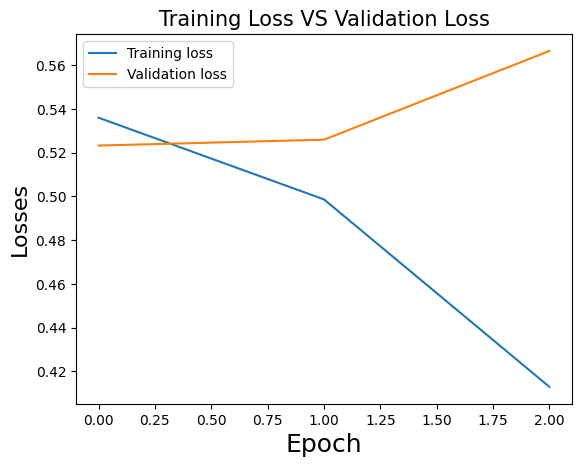

In [ ]:
import matplotlib.pyplot as plt
plt.plot(train_losses, label="Training loss")
plt.plot(val_losses, label="Validation loss")

plt.xlabel('Epoch', fontsize=18)
plt.ylabel('Losses', fontsize=16)
plt.title('Training Loss VS Validation Loss', fontsize=15)

plt.legend()
plt.savefig('/content/drive/My Drive/B4kudo/result/w10_p4-epoch1-0122-cahangebert+calspc-2.eps')

#plt.title("Losses")

In [ ]:
#Test on validation data
model= BERT_cnn_Class().to(device)
model.load_state_dict(torch.load("/content/drive/My Drive/B4kudo/models_saved/w10_p4-0122-cahangebert+calspc-2.pt"))
model.eval()
fin_targets=[]
fin_outputs=[]


with torch.no_grad():
    c=0
    for _, data in enumerate(valid_loader, 0):
        ids_statement = data['ids_statement'].to(device, dtype = torch.long)
        mask_statement = data['mask_statement'].to(device, dtype = torch.long)
        token_type_ids_statement = data['token_type_ids_statement'].to(device, dtype = torch.long)
        ids_meta = data['ids_meta'].to(device, dtype = torch.long)
        mask_meta = data['mask_meta'].to(device, dtype = torch.long)
        token_type_ids_meta = data['token_type_ids_meta'].to(device, dtype = torch.long)

        targets = data['targets'].to(device, dtype = torch.float)
        emotion=data['emotion'].to(device,dtype=torch.float)
        credit = data['credit'].to(device, dtype = torch.float)
        c+=1
        try:
                outputs = model(ids_statement, mask_statement, token_type_ids_statement,
                ids_meta, mask_meta, token_type_ids_meta,
                emotion, credit)
                fin_targets.extend(targets.cpu().detach().numpy().tolist())
                fin_outputs.extend(torch.sigmoid(outputs).cpu().detach().numpy().tolist())
        except EOFError:
          print(f"some error at {c}",EOFError)
outputs=fin_outputs
outputs = np.array(outputs) >= 0.5
targets=fin_targets
accuracy = metrics.accuracy_score(targets, outputs)

f1_score_micro = metrics.f1_score(targets, outputs, average='micro')
f1_score_macro = metrics.f1_score(targets, outputs, average='macro')
recall_micro = metrics.recall_score(targets, outputs, average='micro')
recall_macro = metrics.recall_score(targets, outputs, average='macro')
precision_micro = metrics.precision_score(targets, outputs, average='micro')
precision_macro = metrics.precision_score(targets, outputs, average='macro')
print(f"Epoch: {epoch} - Accuracy Score on validation data = {accuracy}")
print(f"Epoch: {epoch} - F1 Score on Validation Data (Micro) = {f1_score_micro}")
print(f"Epoch: {epoch} - F1 Score on Validation Data (Macro) = {f1_score_macro}")
print(f"Epoch: {epoch} - recall Score on Validation Data (Micro) = {recall_micro}")
print(f"Epoch: {epoch} - recall Score on Validation Data (Macro) = {recall_macro}")
print(f"Epoch: {epoch} - precision Score on Validation Data (Micro) = {precision_micro}")
print(f"Epoch: {epoch} - precision Score on Validation Data (Macro) = {precision_macro}")
# f1_score = metrics.f1_score(targets, outputs)
# recall = metrics.recall_score(targets, outputs)
# precision = metrics.precision_score(targets, outputs)
print("____________________________________________________________\n________________________________________________________________\n\n")

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2614: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Epoch: 2 - Accuracy Score on validation data = 0.7234375
Epoch: 2 - F1 Score on Validation Data (Micro) = 0.7239359625146428
Epoch: 2 - F1 Score on Validation Data (Macro) = 0.6935332150393118
Epoch: 2 - recall Score on Validation Data (Micro) = 0.72421875
Epoch: 2 - recall Score on Validation Data (Macro) = 0.6988280264664222
Epoch: 2 - precision Score on Validation Data (Micro) = 0.7236533957845434
Epoch: 2 - precision Score on Validation Data (Macro) = 0.6899042666539446
____________________________________________________________
________________________________________________________________




01/23　2回目\
statement/meta\
add spc ← not concat\
sentiment_codeなし\
nameなし\
2-4 divide